In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the latent matrix from the saved file
latent_matrix = np.load('/content/drive/MyDrive/TFM/latent_matrix_2dim_2.npy')
class_labels_64_trials = np.load('/content/drive/MyDrive/TFM/class_labels_64_trials_2.npy')

In [4]:
class_labels_64_trials[1]

'A29_24'

Shape of Latent Matrix: (1914, 2)
Shape class_labels_64_trials: 1914


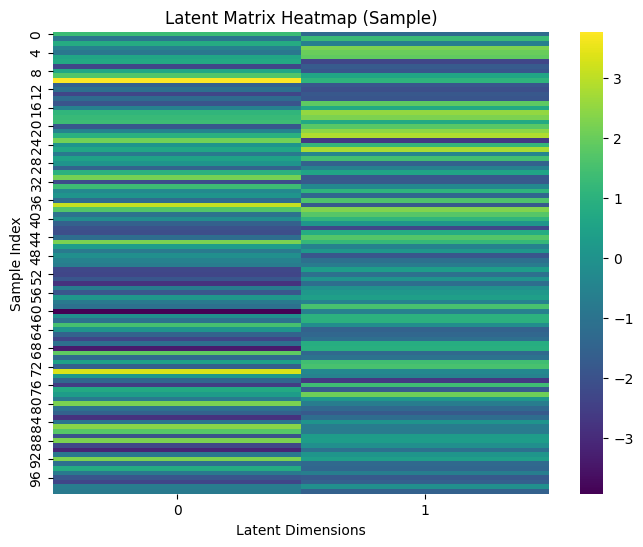

In [5]:
print("Shape of Latent Matrix:", latent_matrix.shape)
# 1914 samples in test set (rows)
# 2 latent dimension = features (columns)
print("Shape class_labels_64_trials:", len(class_labels_64_trials))

# Visualizing a heatmap of the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(latent_matrix[:100], cmap='viridis')  # Displaying the first 100 rows as a heatmap
plt.title('Latent Matrix Heatmap (Sample)')
plt.xlabel('Latent Dimensions')
plt.ylabel('Sample Index')
plt.show()

In [6]:
# Find the indices of 'OM' in class_labels_64_trials_list
original_melody_index = [i for i, label in enumerate(class_labels_64_trials) if label == 'OM_0']
# Get the original melody's latent vector
original_melody_latent = latent_matrix[original_melody_index][0]

In [7]:
# Create a dictionary to store distances for each participant's trials
participant_trial_distances = {}

In [8]:
# Iterate through unique participants and compute distances
participant_ids = set(label.split('_')[0] for label in class_labels_64_trials if label != 'OM_0')
sorted_participant_ids = sorted(participant_ids, key=lambda x: (x[0], int(x[1:])))  # Sort by participant ID

In [9]:
for participant in sorted_participant_ids:
    participant_trials = [(i, latent_matrix[i]) for i, label in enumerate(class_labels_64_trials) if participant in label]
    participant_trials = sorted(participant_trials, key=lambda x: x[0])  # Sort by trial number
    distances = [distance.euclidean(original_melody_latent, trial) for _, trial in participant_trials]
    # Store distances for each trial of the participant
    participant_trial_distances[participant] = distances

In [10]:
sorted_participant_trial_distances = {k: v for k, v in sorted(participant_trial_distances.items(), key=lambda item: item[0])}
sorted_participant_trial_distances.pop('OM', None)
len(sorted_participant_trial_distances)

64

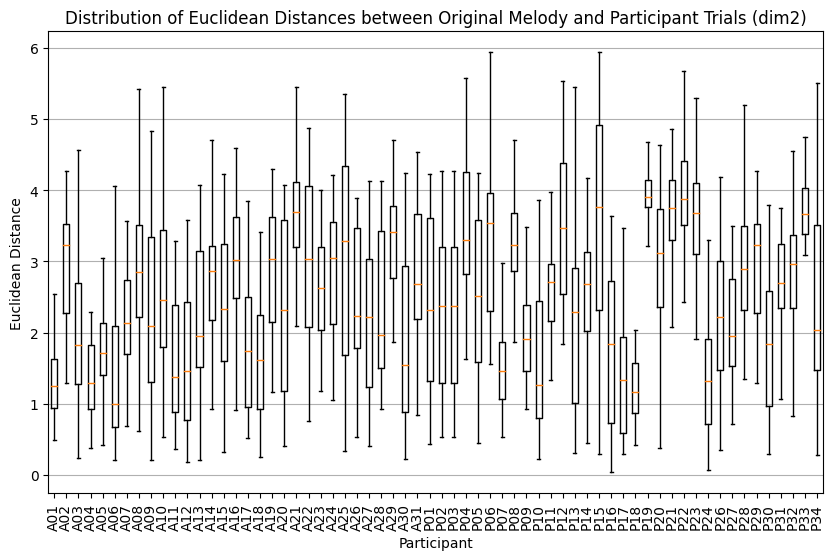

In [11]:
# Extract distances for each participant
distances = list(sorted_participant_trial_distances.values())

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(distances, labels=list(sorted_participant_trial_distances.keys()), showfliers=False)
plt.xlabel('Participant')
plt.ylabel('Euclidean Distance')
plt.title('Distribution of Euclidean Distances between Original Melody and Participant Trials (dim2)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


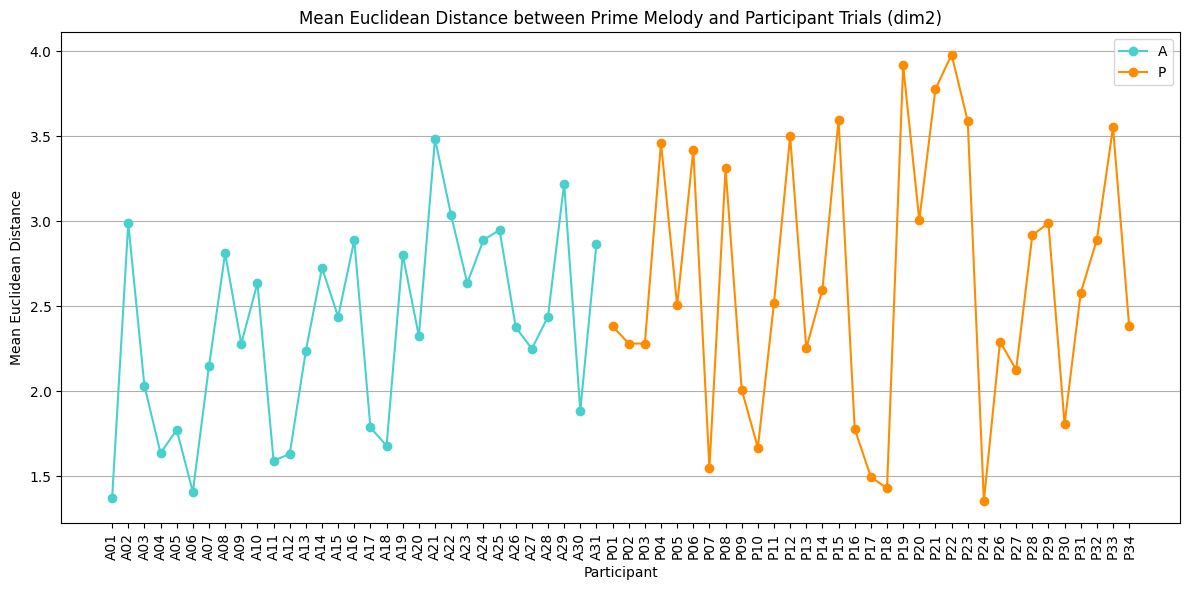

In [12]:
# Divide distances by participant type (A and P)
participant_type_A = {participant: distances for participant, distances in sorted_participant_trial_distances.items() if participant.startswith('A')}
participant_type_P = {participant: distances for participant, distances in sorted_participant_trial_distances.items() if participant.startswith('P')}

# Calculate mean distances for each participant type
mean_distances_A = {participant: sum(distances) / len(distances) for participant, distances in participant_type_A.items()}
mean_distances_P = {participant: sum(distances) / len(distances) for participant, distances in participant_type_P.items()}

# Plot mean distances for each participant type
plt.figure(figsize=(12, 6))

# Plot points and line for participant type A
plt.plot(list(mean_distances_A.keys()), list(mean_distances_A.values()), marker='o', linestyle='-', color='mediumturquoise', label='A')

# Plot points and line for participant type P
plt.plot(list(mean_distances_P.keys()), list(mean_distances_P.values()), marker='o', linestyle='-', color='darkorange', label='P')

plt.xlabel('Participant')
plt.ylabel('Mean Euclidean Distance')
plt.title('Mean Euclidean Distance between Prime Melody and Participant Trials (dim2)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
# Divide distances by participant type (A and P)
participant_type_A = {participant: distances for participant, distances in sorted_participant_trial_distances.items() if participant.startswith('A')}
participant_type_P = {participant: distances for participant, distances in sorted_participant_trial_distances.items() if participant.startswith('P')}

distances_A_OM = []
distances_P_OM = []

for trial in range(1, 31):
    trial_distances_A = []
    trial_distances_P = []

    # Extract distances for trial 'trial' for group A participants
    for participant, distances in participant_type_A.items():
        if trial < len(distances):
            trial_distances_A.append(distances[trial])

    # Extract distances for trial 'trial' for group P participants
    for participant, distances in participant_type_P.items():
        if trial < len(distances):
            trial_distances_P.append(distances[trial])

    # Calculate mean distances for trial 'trial' for group A and group P
    mean_distance_A = np.mean(trial_distances_A)
    mean_distance_P = np.mean(trial_distances_P)

    distances_A_OM.append(mean_distance_A)
    distances_P_OM.append(mean_distance_P)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


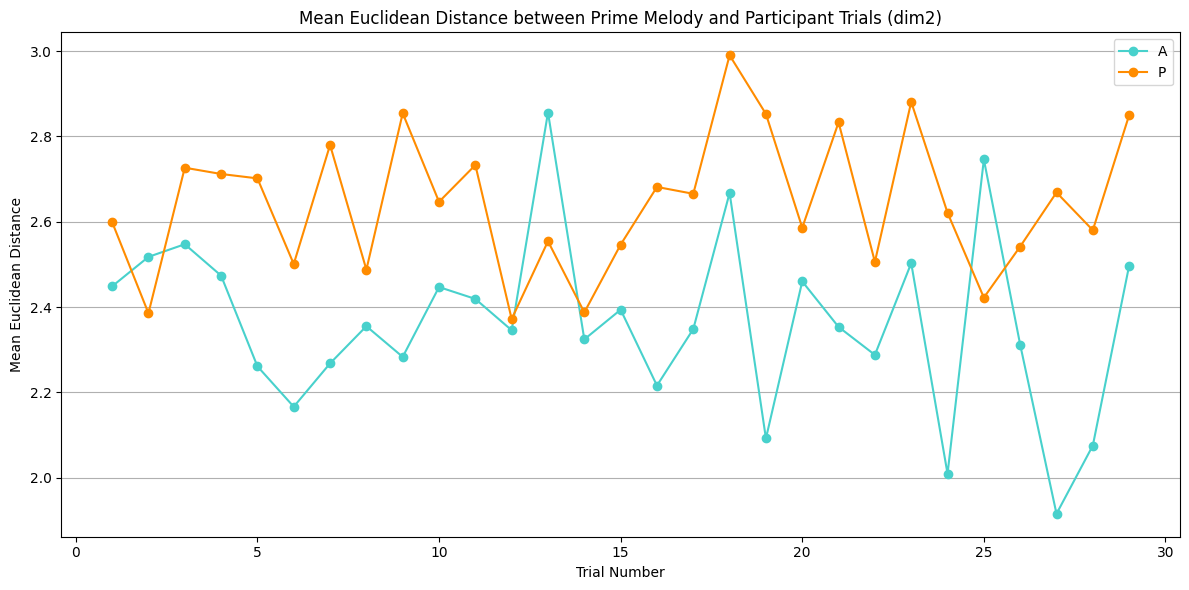

In [22]:
# Plot mean distances for each participant type
plt.figure(figsize=(12, 6))

# Plot points and line for participant type A
plt.plot(range(1, len(distances_A_OM) + 1), distances_A_OM, marker='o', linestyle='-', color='mediumturquoise', label='A')

# Plot points and line for participant type P
plt.plot(range(1, len(distances_P_OM) + 1), distances_P_OM, marker='o', linestyle='-', color='darkorange', label='P')

plt.xlabel('Trial Number')
plt.ylabel('Mean Euclidean Distance')
plt.title('Mean Euclidean Distance between Prime Melody and Participant Trials (dim2)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
# Dictionary to store distances between consecutive trials for each participant
participant_consecutive_trial_distances = {}

In [16]:
for participant in sorted_participant_ids:
    participant_trials = [(i, latent_matrix[i]) for i, label in enumerate(class_labels_64_trials) if participant in label]
    participant_trials = sorted(participant_trials, key=lambda x: x[0])  # Sort by trial number
    distances = [distance.euclidean(participant_trials[i][1], participant_trials[i - 1][1]) for i in range(1, len(participant_trials))]

    first_trial_distance = distance.euclidean(participant_trials[0][1], original_melody_latent)
    distances.insert(0, first_trial_distance)

    # Store distances for each trial of the participant
    participant_consecutive_trial_distances[participant] = distances

In [17]:
len(participant_consecutive_trial_distances)

64

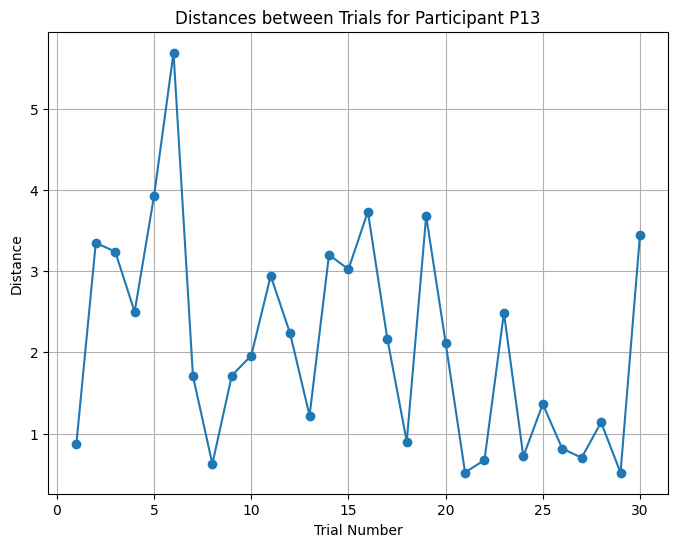

In [18]:
participant_id = 'P13'

participant_distances = participant_consecutive_trial_distances[participant_id]

# Plotting the distances between consecutive trials
plt.figure(figsize=(8, 6))
plt.plot(range(1, 30 + 1), participant_distances, marker='o', linestyle='-')
plt.title(f"Distances between Trials for Participant {participant_id}")
plt.xlabel("Trial Number")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

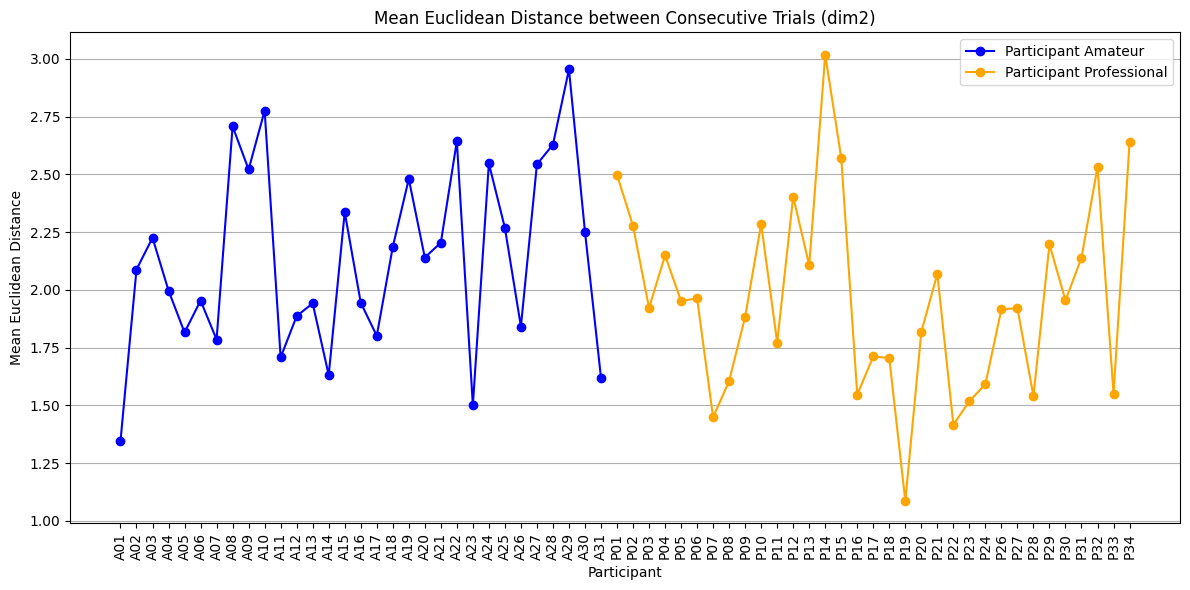

In [19]:
# Divide distances by participant type (A and P)
participant_type_A = {participant: distances for participant, distances in participant_consecutive_trial_distances.items() if participant.startswith('A')}
participant_type_P = {participant: distances for participant, distances in participant_consecutive_trial_distances.items() if participant.startswith('P')}

# Calculate mean distances for each participant type
mean_distances_A = {participant: sum(distances) / len(distances) for participant, distances in participant_type_A.items()}
mean_distances_P = {participant: sum(distances) / len(distances) for participant, distances in participant_type_P.items()}

# Plot mean distances for each participant type
plt.figure(figsize=(12, 6))

# Plot points and line for participant type A
plt.plot(list(mean_distances_A.keys()), list(mean_distances_A.values()), marker='o', linestyle='-', color='blue', label='Participant Amateur')

# Plot points and line for participant type P
plt.plot(list(mean_distances_P.keys()), list(mean_distances_P.values()), marker='o', linestyle='-', color='orange', label='Participant Professional')

plt.xlabel('Participant')
plt.ylabel('Mean Euclidean Distance')
plt.title('Mean Euclidean Distance between Consecutive Trials (dim2)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
# Divide distances by participant type (A and P)
participant_type_A = {participant: distances for participant, distances in participant_consecutive_trial_distances.items() if participant.startswith('A')}
participant_type_P = {participant: distances for participant, distances in participant_consecutive_trial_distances.items() if participant.startswith('P')}

distances_A_C = []
distances_P_C = []

for trial in range(1, 31):
    trial_distances_A = []
    trial_distances_P = []

    # Extract distances for trial 'trial' for group A participants
    for participant, distances in participant_type_A.items():
        if trial < len(distances):
            trial_distances_A.append(distances[trial])

    # Extract distances for trial 'trial' for group P participants
    for participant, distances in participant_type_P.items():
        if trial < len(distances):
            trial_distances_P.append(distances[trial])

    # Calculate mean distances for trial 'trial' for group A and group P
    mean_distance_A = np.mean(trial_distances_A)
    mean_distance_P = np.mean(trial_distances_P)

    distances_A_C.append(mean_distance_A)
    distances_P_C.append(mean_distance_P)

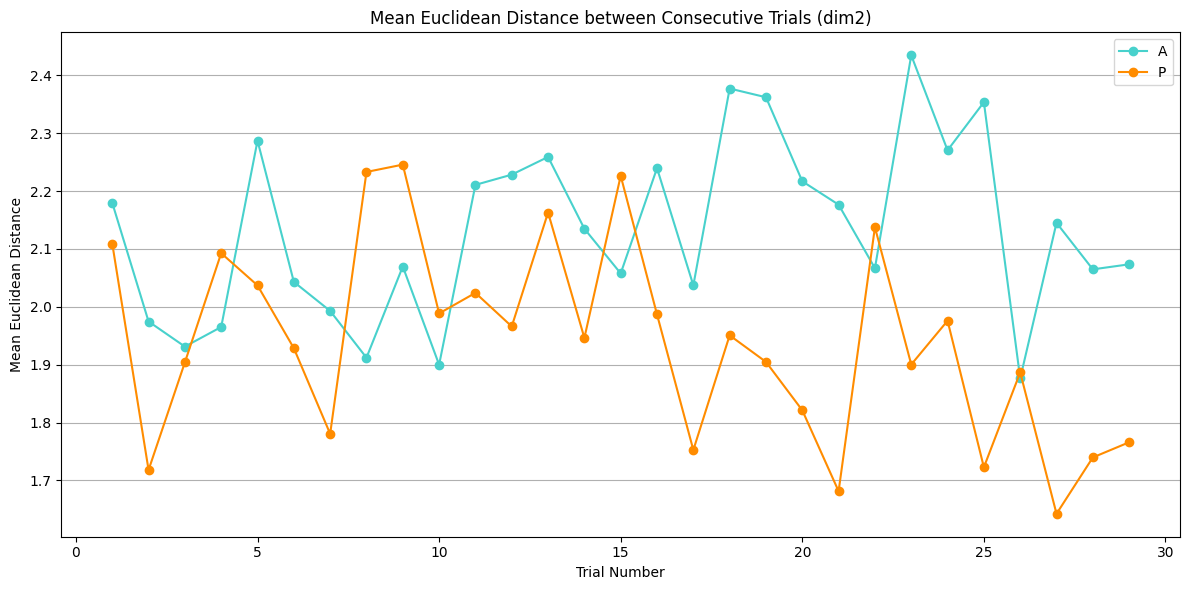

In [23]:
# Plot mean distances for each participant type
plt.figure(figsize=(12, 6))

# Plot points and line for participant type A
plt.plot(range(1, len(distances_A_C) + 1), distances_A_C, marker='o', linestyle='-', color='mediumturquoise', label='A')

# Plot points and line for participant type P
plt.plot(range(1, len(distances_P_C) + 1), distances_P_C, marker='o', linestyle='-', color='darkorange', label='P')

plt.xlabel('Trial Number')
plt.ylabel('Mean Euclidean Distance')
plt.title('Mean Euclidean Distance between Consecutive Trials (dim2)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()